In [1]:
# turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import underthesea as uts
import wordcloud
import pandas_profiling
# import scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


No module named 'fasttext'


In [3]:
# load data
df = pd.read_csv('dataset/processed_data.csv', encoding='utf-8')

In [4]:
# check data
df.head()

,rating,comment,class,Sentiment
0,1.0,tệ gói tương_ớt tương_về tương món gói không_h...,Dislike,0
1,4.2,kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượ...,Dislike,0
2,7.4,khuyến_mại tặng trà sữa uống đồ_ăn,Like,1
3,1.0,thề lắm tức_giận thế_này quảng_cáo minion háo_...,Dislike,0
4,10.0,đầu thử vị thần_thánh đồ_ăn hơi kén đầu không_...,Like,1


In [5]:
# check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24129 entries, 0 to 24128
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rating     24129 non-null  float64
 1   comment    24128 non-null  object 
 2   class      24129 non-null  object 
 3   Sentiment  24129 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 754.2+ KB


In [6]:
# check duplicate
df.duplicated().sum()

0

In [7]:
# check missing values
df.isnull().sum()

rating       0
comment      1
class        0
Sentiment    0
dtype: int64

In [8]:
# remove missing values
df.dropna(inplace=True)

## 2. Count vectorizer

In [9]:
X=df['comment']
y=df['Sentiment']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# apply CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

## 3.Use [MultinomialNB(), LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()] to classify the data

In [12]:
# create function to train model and predict
def train_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
    print('Classification report: ', classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [13]:
# list of models
models = [MultinomialNB(), LogisticRegression(),
        RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()
        ]

In [14]:
# import time
import time

model:  MultinomialNB
Accuracy:  0.9086199751346871
Confusion matrix:  [[ 431  369]
 [  72 3954]]
Classification report:                precision    recall  f1-score   support

           0       0.86      0.54      0.66       800
           1       0.91      0.98      0.95      4026

    accuracy                           0.91      4826
   macro avg       0.89      0.76      0.80      4826
weighted avg       0.91      0.91      0.90      4826



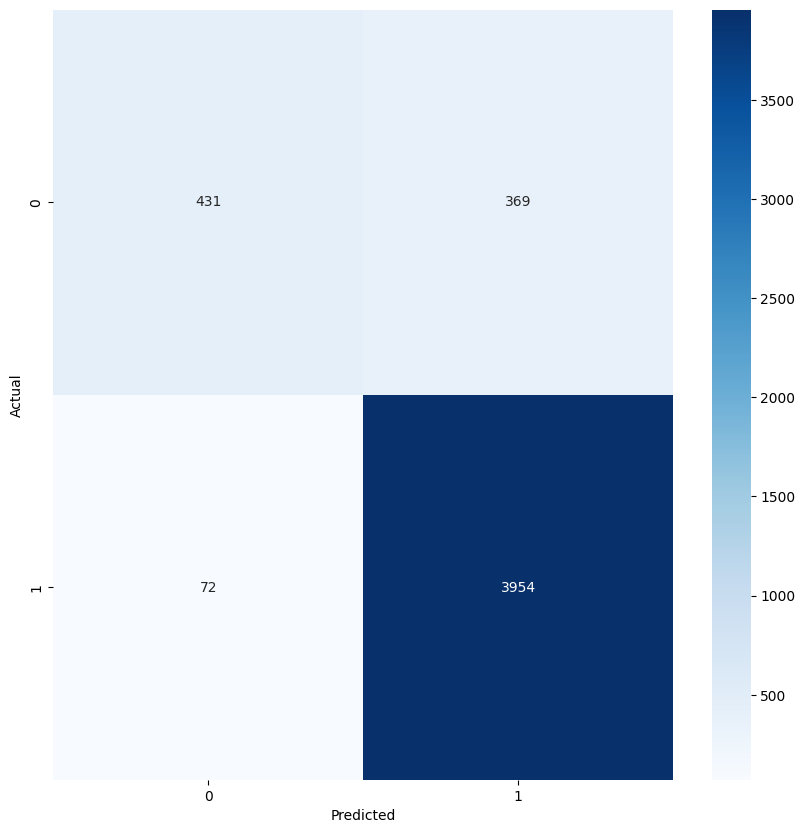

----------------------------------------------------------------------------------------------------
model:  LogisticRegression
Accuracy:  0.9127641939494405
Confusion matrix:  [[ 520  280]
 [ 141 3885]]
Classification report:                precision    recall  f1-score   support

           0       0.79      0.65      0.71       800
           1       0.93      0.96      0.95      4026

    accuracy                           0.91      4826
   macro avg       0.86      0.81      0.83      4826
weighted avg       0.91      0.91      0.91      4826



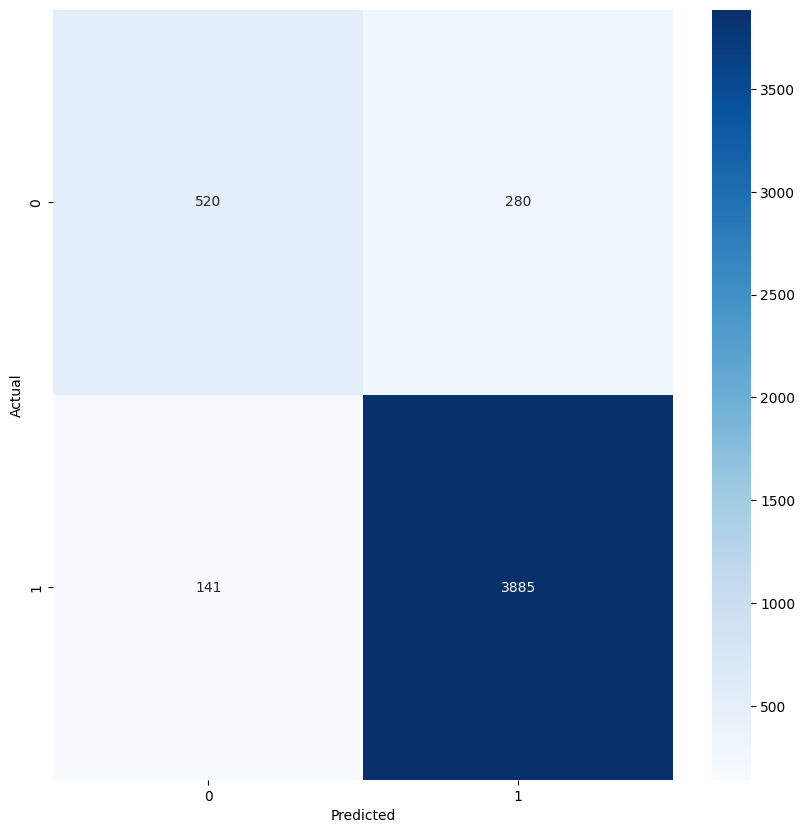

----------------------------------------------------------------------------------------------------
model:  RandomForestClassifier
Accuracy:  0.8970161624533776
Confusion matrix:  [[ 371  429]
 [  68 3958]]
Classification report:                precision    recall  f1-score   support

           0       0.85      0.46      0.60       800
           1       0.90      0.98      0.94      4026

    accuracy                           0.90      4826
   macro avg       0.87      0.72      0.77      4826
weighted avg       0.89      0.90      0.88      4826



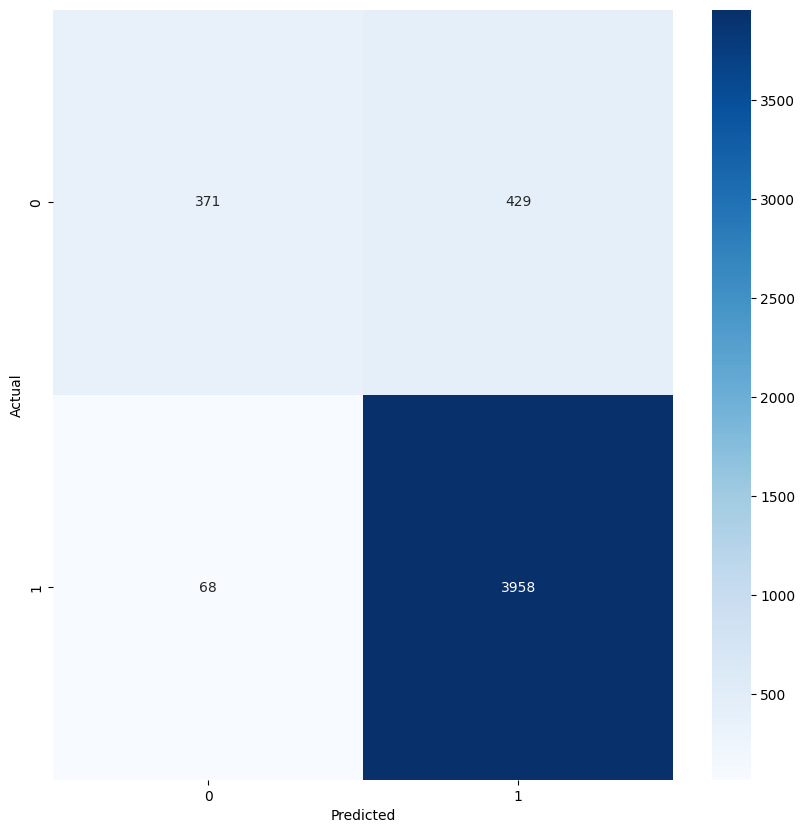

----------------------------------------------------------------------------------------------------
model:  DecisionTreeClassifier
Accuracy:  0.8593037712391214
Confusion matrix:  [[ 459  341]
 [ 338 3688]]
Classification report:                precision    recall  f1-score   support

           0       0.58      0.57      0.57       800
           1       0.92      0.92      0.92      4026

    accuracy                           0.86      4826
   macro avg       0.75      0.74      0.75      4826
weighted avg       0.86      0.86      0.86      4826



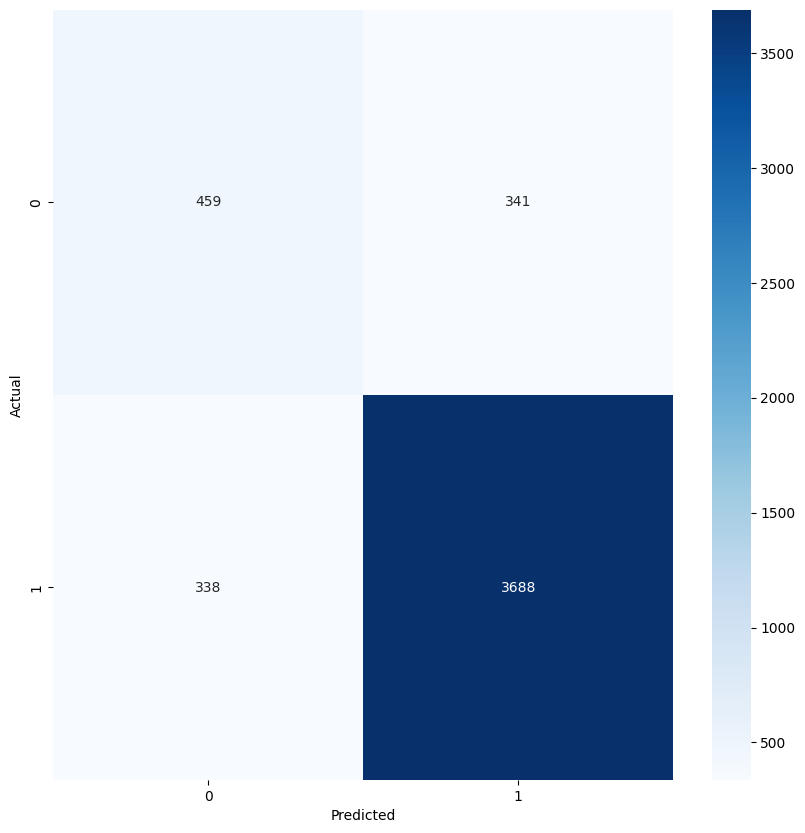

----------------------------------------------------------------------------------------------------
model:  KNeighborsClassifier
Accuracy:  0.8327807708246996
Confusion matrix:  [[ 139  661]
 [ 146 3880]]
Classification report:                precision    recall  f1-score   support

           0       0.49      0.17      0.26       800
           1       0.85      0.96      0.91      4026

    accuracy                           0.83      4826
   macro avg       0.67      0.57      0.58      4826
weighted avg       0.79      0.83      0.80      4826



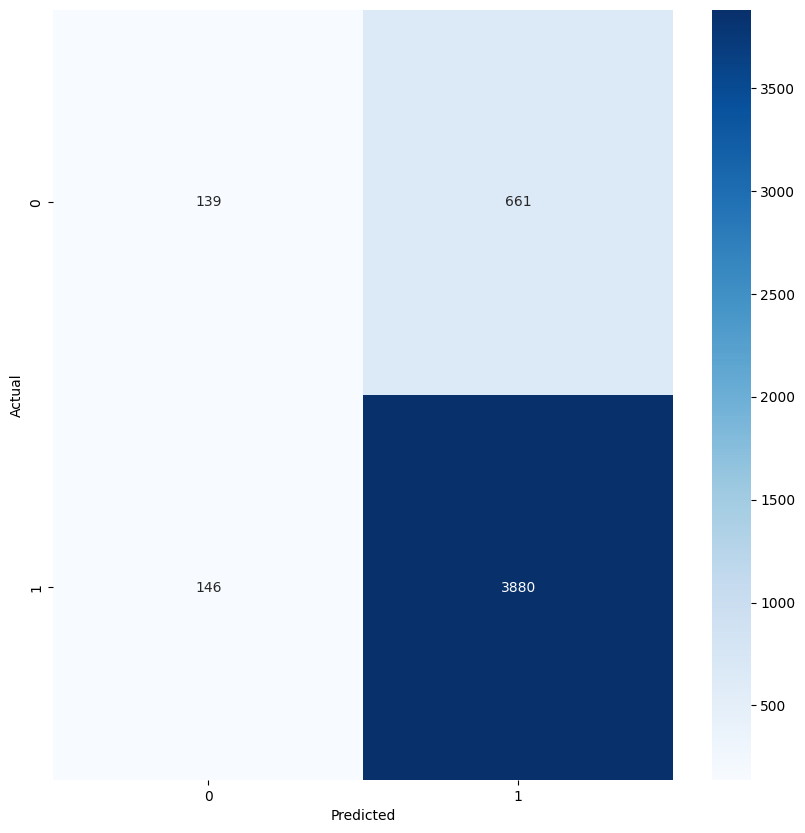

----------------------------------------------------------------------------------------------------


,model,accuracy,time_train
0,MultinomialNB,0.908620,0.146579
1,LogisticRegression,0.912764,0.404005
2,RandomForestClassifier,0.897016,26.219274
3,DecisionTreeClassifier,0.859304,3.538047
4,KNeighborsClassifier,0.832781,4.897558


In [16]:
# train, predict and creata report to evaluate model all models
# create list of model name
model_name = []
# create list of accuracy
accuracy = []
# time to train and predict
time_ = []

for model in models:
    print('model: ', model.__class__.__name__)
    start_time = time.time()
    
    train_predict(model, X_train_cv, X_test_cv, y_train, y_test)
    y_pred = model.predict(X_test_cv)
    print('-'*100)
    
    # append model name to model_name
    model_name.append(model.__class__.__name__)
    # append accuracy to accuracy
    accuracy.append(accuracy_score(y_test, y_pred))
    # append time to time
    time_.append(time.time() - start_time)
# create dataframe
df_report = pd.DataFrame({'model': model_name, 'accuracy': accuracy, 'time_train': time_})
df_report

# Undersampling

In [17]:
# count number of positive and negative sentiment
df['Sentiment'].value_counts()

Sentiment
1    19917
0     4211
Name: count, dtype: int64

In [18]:
# Under sampling data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_cv, y_train)

In [19]:
# check data
y_rus.value_counts()

Sentiment
0    3411
1    3411
Name: count, dtype: int64

model:  MultinomialNB
Accuracy:  0.9090343970161624
Confusion matrix:  [[ 663  137]
 [ 302 3724]]
Classification report:                precision    recall  f1-score   support

           0       0.69      0.83      0.75       800
           1       0.96      0.92      0.94      4026

    accuracy                           0.91      4826
   macro avg       0.83      0.88      0.85      4826
weighted avg       0.92      0.91      0.91      4826



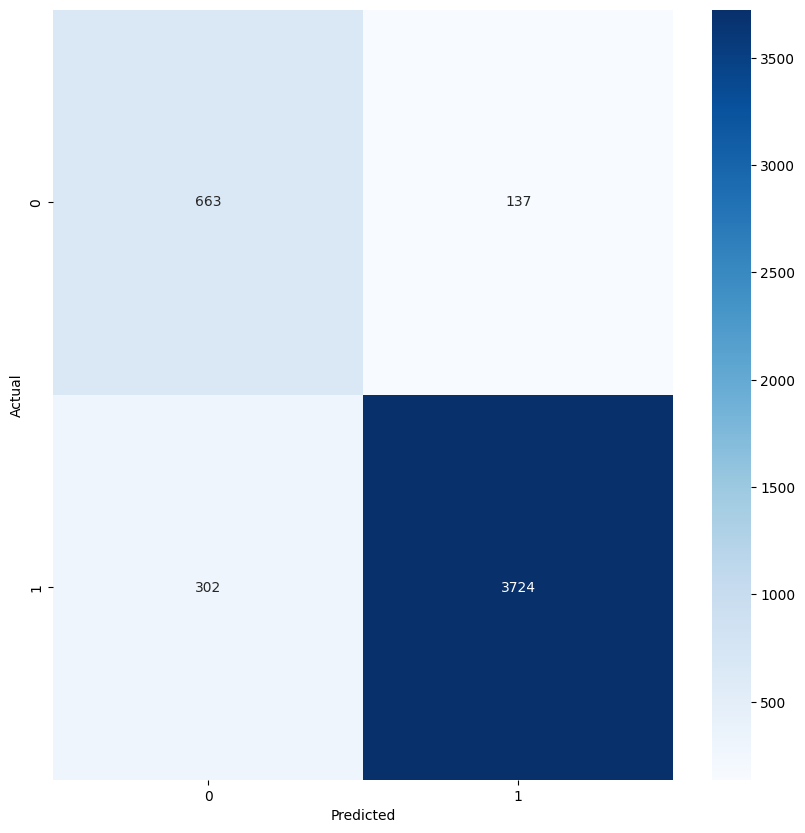

----------------------------------------------------------------------------------------------------
model:  LogisticRegression
Accuracy:  0.8619975134687111
Confusion matrix:  [[ 696  104]
 [ 562 3464]]
Classification report:                precision    recall  f1-score   support

           0       0.55      0.87      0.68       800
           1       0.97      0.86      0.91      4026

    accuracy                           0.86      4826
   macro avg       0.76      0.87      0.79      4826
weighted avg       0.90      0.86      0.87      4826



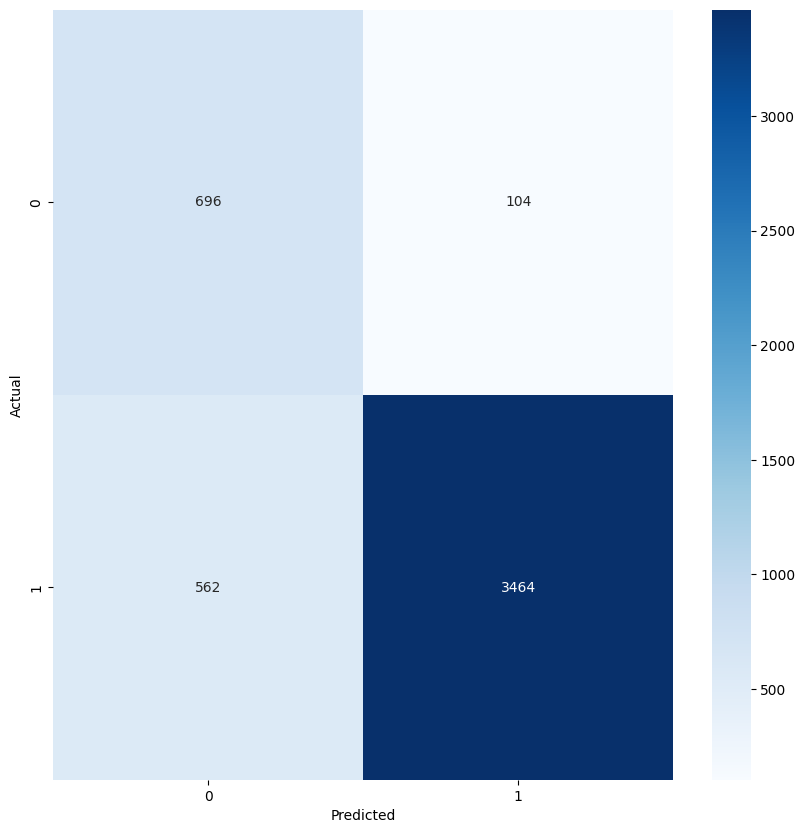

----------------------------------------------------------------------------------------------------
model:  RandomForestClassifier
Accuracy:  0.8791960215499378
Confusion matrix:  [[ 655  145]
 [ 438 3588]]
Classification report:                precision    recall  f1-score   support

           0       0.60      0.82      0.69       800
           1       0.96      0.89      0.92      4026

    accuracy                           0.88      4826
   macro avg       0.78      0.85      0.81      4826
weighted avg       0.90      0.88      0.89      4826



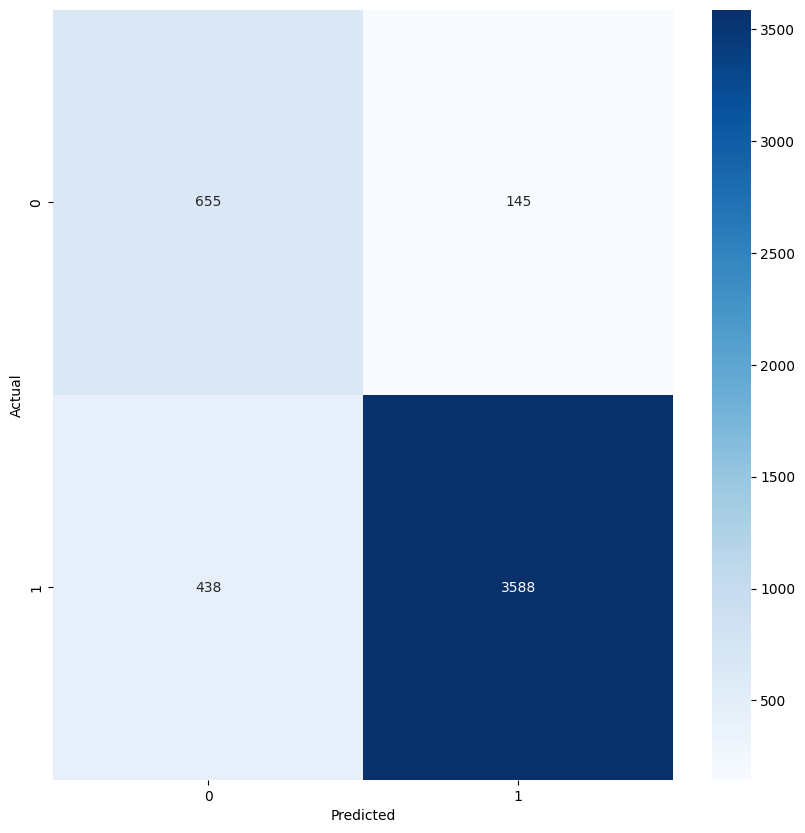

----------------------------------------------------------------------------------------------------
model:  DecisionTreeClassifier
Accuracy:  0.7766266058847907
Confusion matrix:  [[ 605  195]
 [ 883 3143]]
Classification report:                precision    recall  f1-score   support

           0       0.41      0.76      0.53       800
           1       0.94      0.78      0.85      4026

    accuracy                           0.78      4826
   macro avg       0.67      0.77      0.69      4826
weighted avg       0.85      0.78      0.80      4826



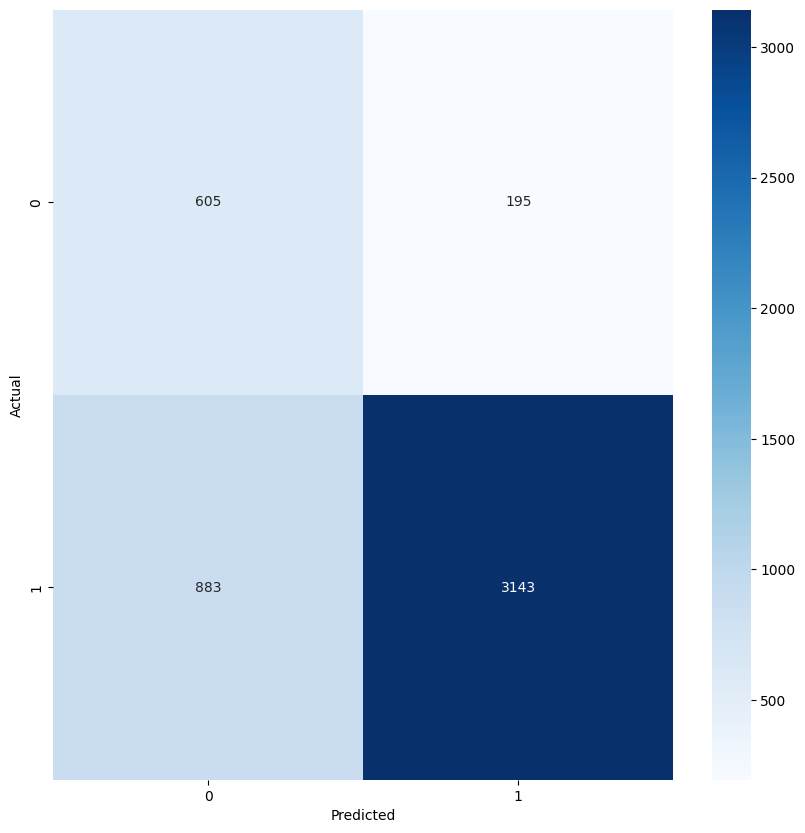

----------------------------------------------------------------------------------------------------
model:  KNeighborsClassifier
Accuracy:  0.6980936593452134
Confusion matrix:  [[ 425  375]
 [1082 2944]]
Classification report:                precision    recall  f1-score   support

           0       0.28      0.53      0.37       800
           1       0.89      0.73      0.80      4026

    accuracy                           0.70      4826
   macro avg       0.58      0.63      0.59      4826
weighted avg       0.79      0.70      0.73      4826



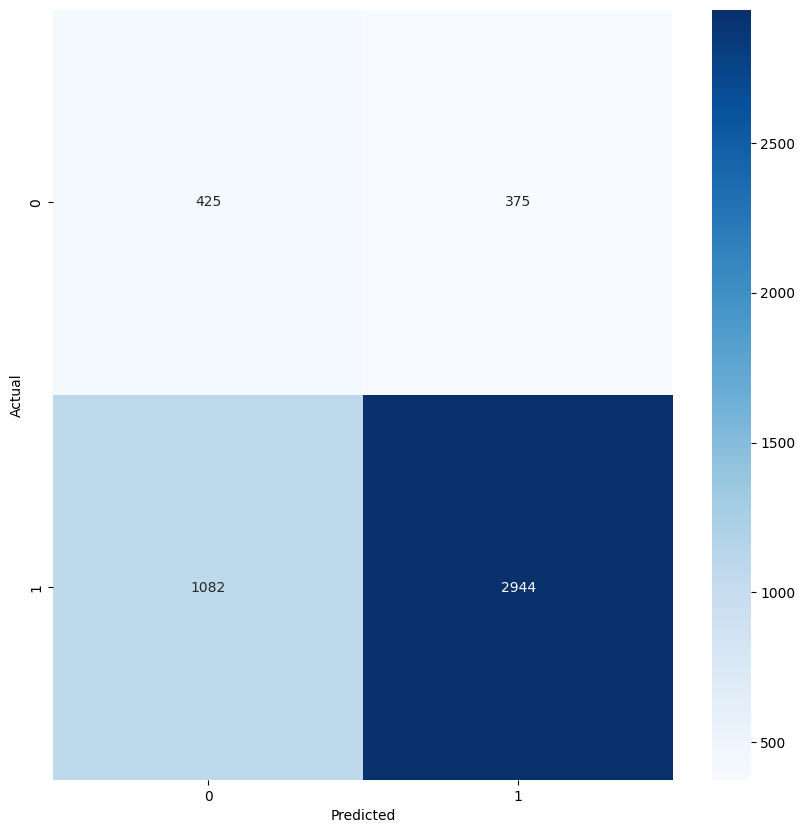

----------------------------------------------------------------------------------------------------


,model,accuracy,time_train
0,MultinomialNB,0.909034,0.121696
1,LogisticRegression,0.861998,0.339796
2,RandomForestClassifier,0.879196,17.745052
3,DecisionTreeClassifier,0.776627,1.116512
4,KNeighborsClassifier,0.698094,2.073469


In [20]:
# train, predict and creata report to evaluate model all models
# create list of model name
model_name = []
# create list of accuracy
accuracy = []
# time to train and predict
time_ = []

for model in models:
    print('model: ', model.__class__.__name__)
    start_time = time.time()
    
    train_predict(model, X_rus, X_test_cv, y_rus, y_test)
    y_pred = model.predict(X_test_cv)
    print('-'*100)
    
    # append model name to model_name
    model_name.append(model.__class__.__name__)
    # append accuracy to accuracy
    accuracy.append(accuracy_score(y_test, y_pred))
    # append time to time
    time_.append(time.time() - start_time)
# create dataframe
df_report_2 = pd.DataFrame({'model': model_name, 'accuracy': accuracy, 'time_train': time_})
df_report_2

# Oversampling

In [21]:
# Over sampling data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train_cv, y_train)

In [22]:
# check data
y_ros.value_counts()

Sentiment
1    15891
0    15891
Name: count, dtype: int64

model:  MultinomialNB
Accuracy:  0.9113137173642768
Confusion matrix:  [[ 646  154]
 [ 274 3752]]
Classification report:                precision    recall  f1-score   support

           0       0.70      0.81      0.75       800
           1       0.96      0.93      0.95      4026

    accuracy                           0.91      4826
   macro avg       0.83      0.87      0.85      4826
weighted avg       0.92      0.91      0.91      4826



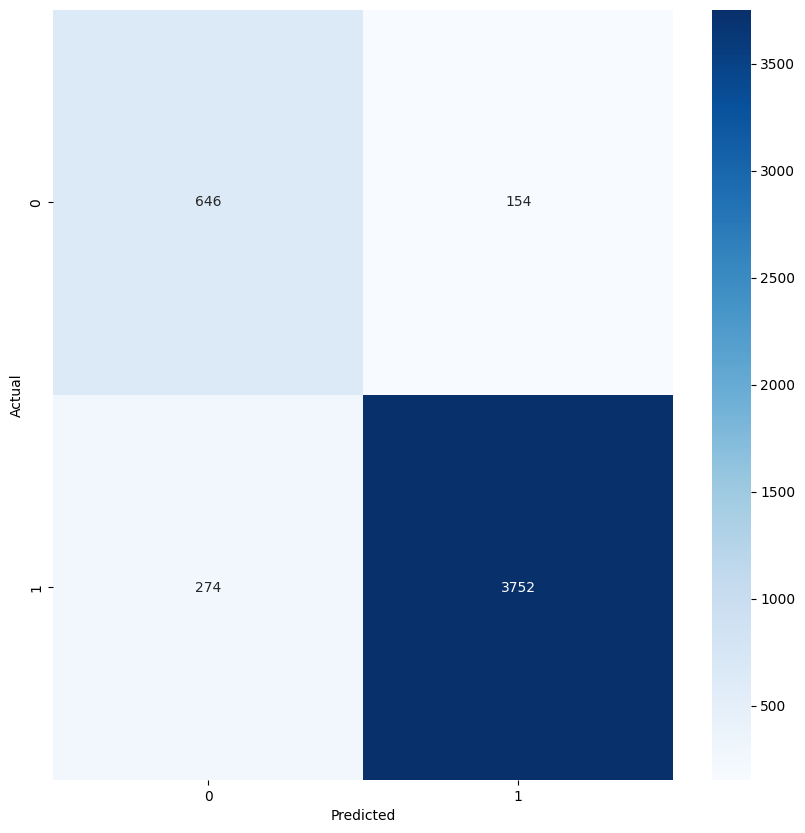

----------------------------------------------------------------------------------------------------
model:  LogisticRegression
Accuracy:  0.8941152092830501
Confusion matrix:  [[ 624  176]
 [ 335 3691]]
Classification report:                precision    recall  f1-score   support

           0       0.65      0.78      0.71       800
           1       0.95      0.92      0.94      4026

    accuracy                           0.89      4826
   macro avg       0.80      0.85      0.82      4826
weighted avg       0.90      0.89      0.90      4826



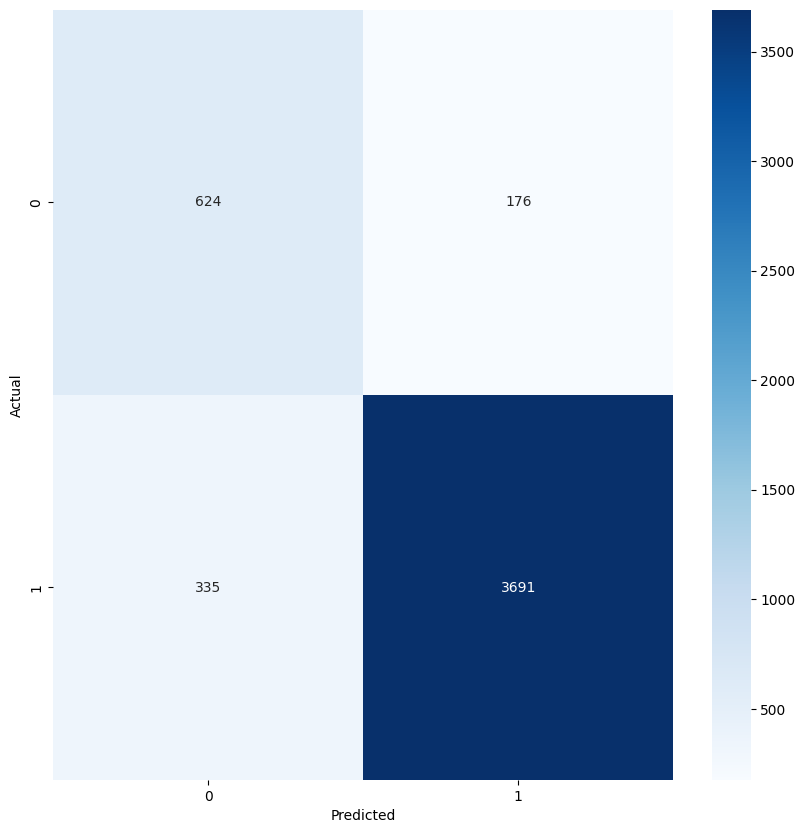

----------------------------------------------------------------------------------------------------
model:  RandomForestClassifier
Accuracy:  0.9028180687940324
Confusion matrix:  [[ 442  358]
 [ 111 3915]]
Classification report:                precision    recall  f1-score   support

           0       0.80      0.55      0.65       800
           1       0.92      0.97      0.94      4026

    accuracy                           0.90      4826
   macro avg       0.86      0.76      0.80      4826
weighted avg       0.90      0.90      0.90      4826



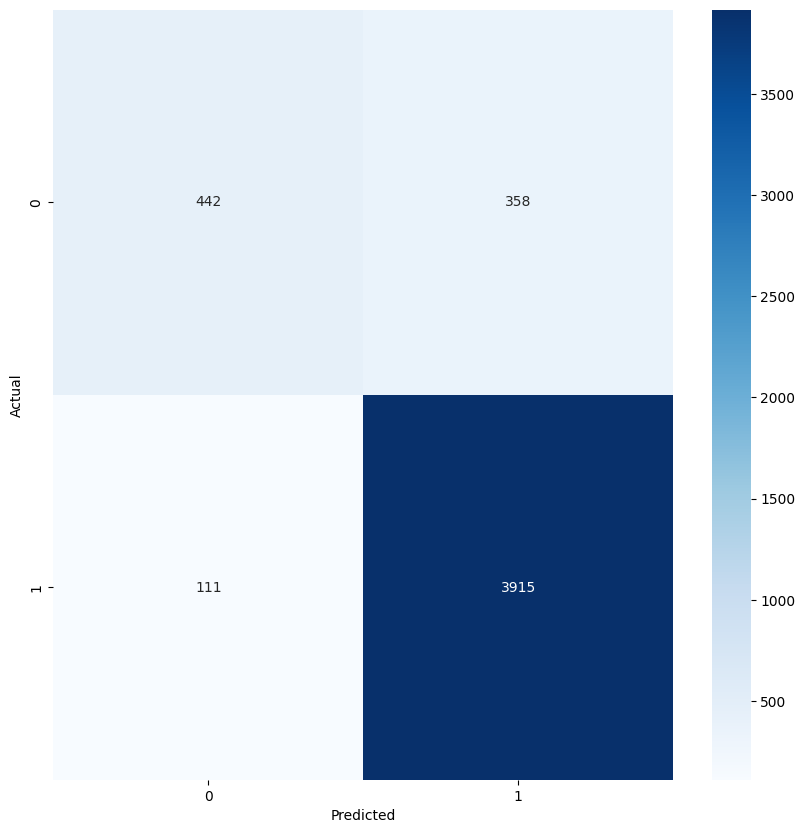

----------------------------------------------------------------------------------------------------
model:  DecisionTreeClassifier
Accuracy:  0.8503937007874016
Confusion matrix:  [[ 497  303]
 [ 419 3607]]
Classification report:                precision    recall  f1-score   support

           0       0.54      0.62      0.58       800
           1       0.92      0.90      0.91      4026

    accuracy                           0.85      4826
   macro avg       0.73      0.76      0.74      4826
weighted avg       0.86      0.85      0.85      4826



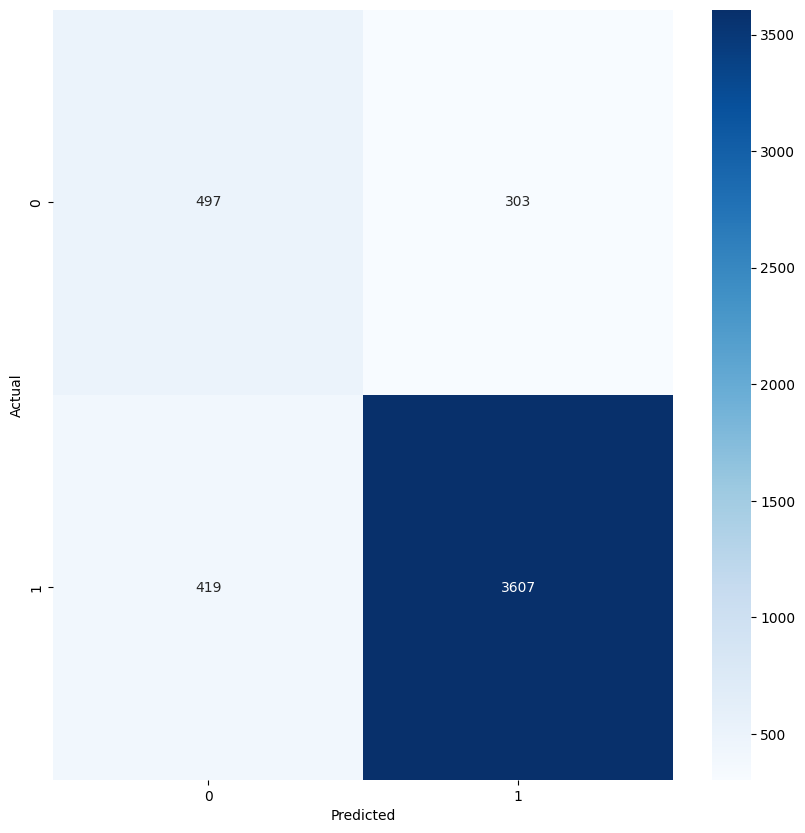

----------------------------------------------------------------------------------------------------
model:  KNeighborsClassifier
Accuracy:  0.7225445503522586
Confusion matrix:  [[ 437  363]
 [ 976 3050]]
Classification report:                precision    recall  f1-score   support

           0       0.31      0.55      0.39       800
           1       0.89      0.76      0.82      4026

    accuracy                           0.72      4826
   macro avg       0.60      0.65      0.61      4826
weighted avg       0.80      0.72      0.75      4826



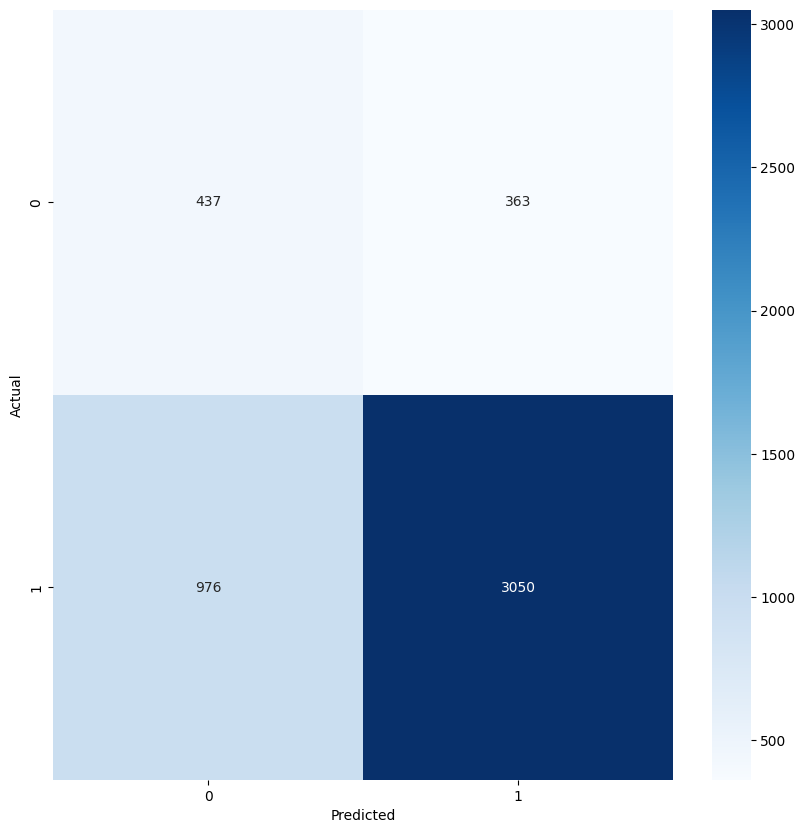

----------------------------------------------------------------------------------------------------


,model,accuracy,time_train
0,MultinomialNB,0.911314,0.133109
1,LogisticRegression,0.894115,1.090333
2,RandomForestClassifier,0.902818,42.169649
3,DecisionTreeClassifier,0.850394,3.897850
4,KNeighborsClassifier,0.722545,7.794822


In [23]:
# train, predict and creata report to evaluate model all models
# create list of model name
model_name = []
# create list of accuracy
accuracy = []
# time to train and predict
time_ = []

for model in models:
    print('model: ', model.__class__.__name__)
    start_time = time.time()
    
    train_predict(model, X_ros, X_test_cv, y_ros, y_test)
    y_pred = model.predict(X_test_cv)
    print('-'*100)
    
    # append model name to model_name
    model_name.append(model.__class__.__name__)
    # append accuracy to accuracy
    accuracy.append(accuracy_score(y_test, y_pred))
    # append time to time
    time_.append(time.time() - start_time)
# create dataframe
df_report_3 = pd.DataFrame({'model': model_name, 'accuracy': accuracy, 'time_train': time_})
df_report_3

In [24]:
# SMOTE data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_cv, y_train)

In [25]:
# check data
y_smote.value_counts()

Sentiment
1    15891
0    15891
Name: count, dtype: int64

model:  MultinomialNB
Accuracy:  0.9171156237049316
Confusion matrix:  [[ 613  187]
 [ 213 3813]]
Classification report:                precision    recall  f1-score   support

           0       0.74      0.77      0.75       800
           1       0.95      0.95      0.95      4026

    accuracy                           0.92      4826
   macro avg       0.85      0.86      0.85      4826
weighted avg       0.92      0.92      0.92      4826



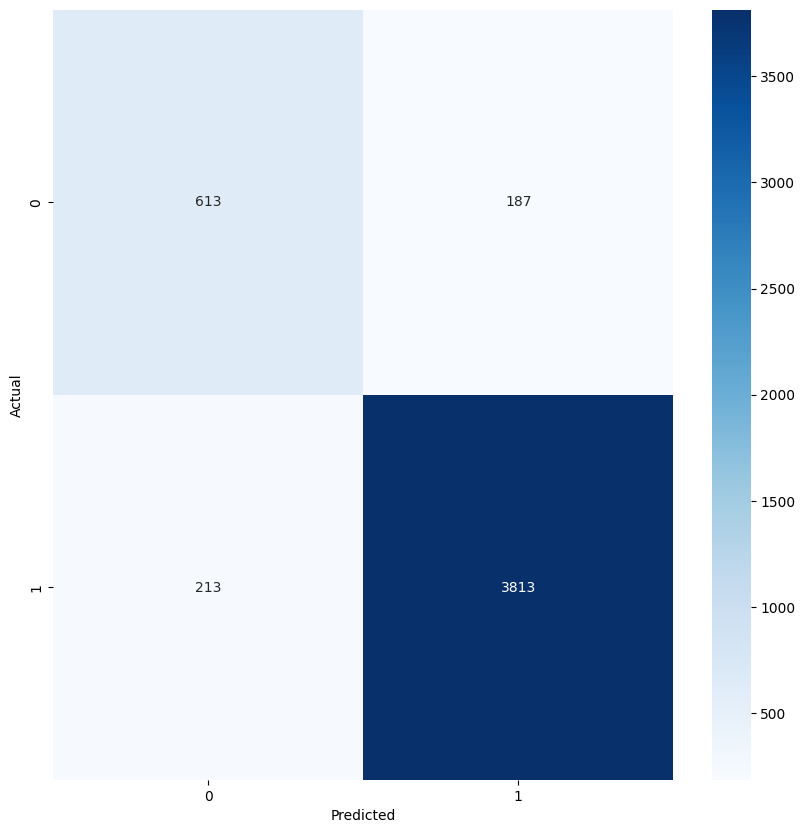

----------------------------------------------------------------------------------------------------
model:  LogisticRegression
Accuracy:  0.8615830915872358
Confusion matrix:  [[ 614  186]
 [ 482 3544]]
Classification report:                precision    recall  f1-score   support

           0       0.56      0.77      0.65       800
           1       0.95      0.88      0.91      4026

    accuracy                           0.86      4826
   macro avg       0.76      0.82      0.78      4826
weighted avg       0.89      0.86      0.87      4826



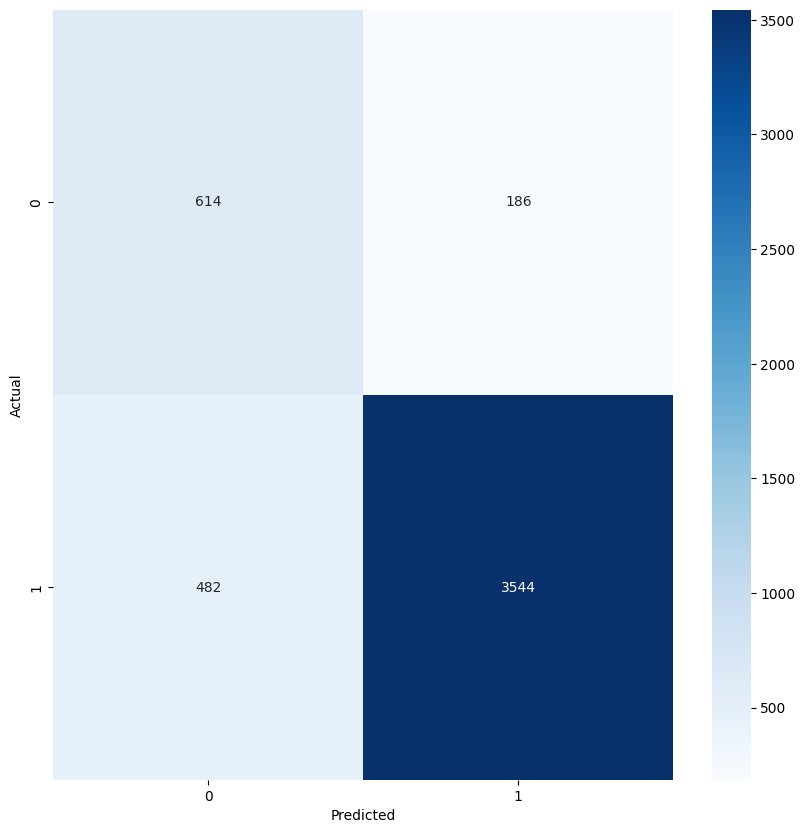

----------------------------------------------------------------------------------------------------
model:  RandomForestClassifier
Accuracy:  0.853294653957729
Confusion matrix:  [[ 466  334]
 [ 374 3652]]
Classification report:                precision    recall  f1-score   support

           0       0.55      0.58      0.57       800
           1       0.92      0.91      0.91      4026

    accuracy                           0.85      4826
   macro avg       0.74      0.74      0.74      4826
weighted avg       0.86      0.85      0.85      4826



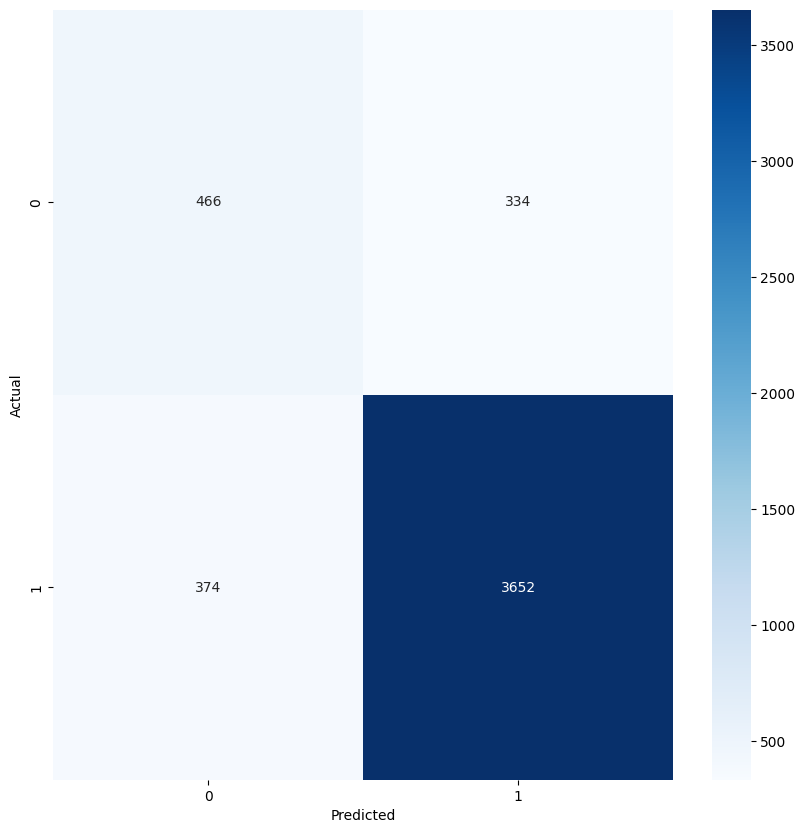

----------------------------------------------------------------------------------------------------
model:  DecisionTreeClassifier
Accuracy:  0.8058433485288024
Confusion matrix:  [[ 458  342]
 [ 595 3431]]
Classification report:                precision    recall  f1-score   support

           0       0.43      0.57      0.49       800
           1       0.91      0.85      0.88      4026

    accuracy                           0.81      4826
   macro avg       0.67      0.71      0.69      4826
weighted avg       0.83      0.81      0.82      4826



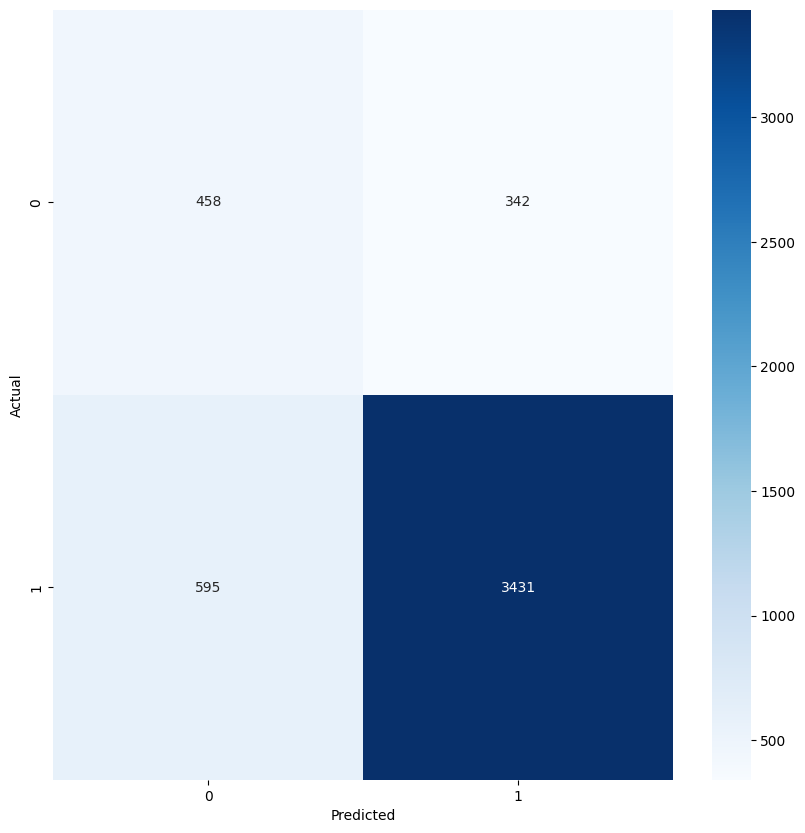

----------------------------------------------------------------------------------------------------
model:  KNeighborsClassifier
Accuracy:  0.24782428512225446
Confusion matrix:  [[ 785   15]
 [3615  411]]
Classification report:                precision    recall  f1-score   support

           0       0.18      0.98      0.30       800
           1       0.96      0.10      0.18      4026

    accuracy                           0.25      4826
   macro avg       0.57      0.54      0.24      4826
weighted avg       0.83      0.25      0.20      4826



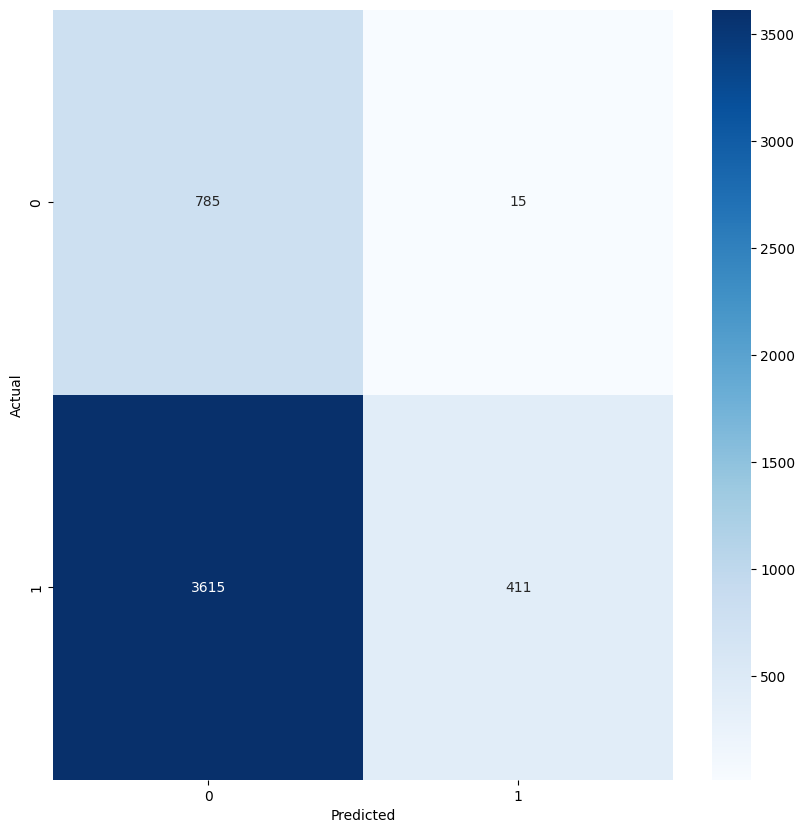

----------------------------------------------------------------------------------------------------


,model,accuracy,time_train
0,MultinomialNB,0.917116,0.125029
1,LogisticRegression,0.861583,0.519946
2,RandomForestClassifier,0.853295,65.539456
3,DecisionTreeClassifier,0.805843,5.834025
4,KNeighborsClassifier,0.247824,8.351683


In [26]:
# train, predict and creata report to evaluate model all models
# create list of model name
model_name = []
# create list of accuracy
accuracy = []
# time to train and predict
time_ = []

for model in models:
    print('model: ', model.__class__.__name__)
    start_time = time.time()
    
    train_predict(model, X_smote, X_test_cv, y_smote, y_test)
    y_pred = model.predict(X_test_cv)
    print('-'*100)
    
    # append model name to model_name
    model_name.append(model.__class__.__name__)
    # append accuracy to accuracy
    accuracy.append(accuracy_score(y_test, y_pred))
    # append time to time
    time_.append(time.time() - start_time)
# create dataframe
df_report_4 = pd.DataFrame({'model': model_name, 'accuracy': accuracy, 'time_train': time_})
df_report_4

In [27]:
# print all report
print('Original data')
print(df_report)
print('-'*50)
print('Under sampling data')
print(df_report_2)
print('-'*50)
print('Over sampling data')
print(df_report_3)
print('-'*50)
print('SMOTE data')
print(df_report_4)

Original data
                    model  accuracy  time_train
0           MultinomialNB  0.908620    0.146579
1      LogisticRegression  0.912764    0.404005
2  RandomForestClassifier  0.897016   26.219274
3  DecisionTreeClassifier  0.859304    3.538047
4    KNeighborsClassifier  0.832781    4.897558
--------------------------------------------------
Under sampling data
                    model  accuracy  time_train
0           MultinomialNB  0.909034    0.121696
1      LogisticRegression  0.861998    0.339796
2  RandomForestClassifier  0.879196   17.745052
3  DecisionTreeClassifier  0.776627    1.116512
4    KNeighborsClassifier  0.698094    2.073469
--------------------------------------------------
Over sampling data
                    model  accuracy  time_train
0           MultinomialNB  0.911314    0.133109
1      LogisticRegression  0.894115    1.090333
2  RandomForestClassifier  0.902818   42.169649
3  DecisionTreeClassifier  0.850394    3.897850
4    KNeighborsClassifier  0.